In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
from sklearn.linear_model import LinearRegression
data = fetch_olivetti_faces()
targets = data.target

In [4]:
import pprint
pp = pprint.PrettyPrinter() 
pp.pprint(data)

{'DESCR': 'Modified Olivetti faces dataset.\n'
          '\n'
          'The original database was available from\n'
          '\n'
          '    '
          'http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n'
          '\n'
          'The version retrieved here comes in MATLAB format from the '
          'personal\n'
          'web page of Sam Roweis:\n'
          '\n'
          '    http://www.cs.nyu.edu/~roweis/\n'
          '\n'
          'There are ten different images of each of 40 distinct subjects. For '
          'some\n'
          'subjects, the images were taken at different times, varying the '
          'lighting,\n'
          'facial expressions (open / closed eyes, smiling / not smiling) and '
          'facial\n'
          'details (glasses / no glasses). All the images were taken against a '
          'dark\n'
          'homogeneous background with the subjects in an upright, frontal '
          'position (with\n'
          'tolerance for some side m

In [5]:
img_data = data.images.reshape((len(data.images), -1))

In [6]:
img_data.shape

(400, 4096)

In [7]:
train = img_data[:395]
test = img_data[-5:]

In [9]:
n_faces = 5

In [10]:
n_pixels = img_data.shape[1]
x_train = train[:, :(n_pixels + 1)//2]
y_train = train[:, (n_pixels//2):]

x_test = test[:, :(n_pixels+1)//2]
y_test = test[:, n_pixels//2:]

In [11]:
reg = LinearRegression().fit(x_train, y_train)
pred_data = reg.predict(x_test)

In [12]:
image_shape = (64,64)
n_cols = 2

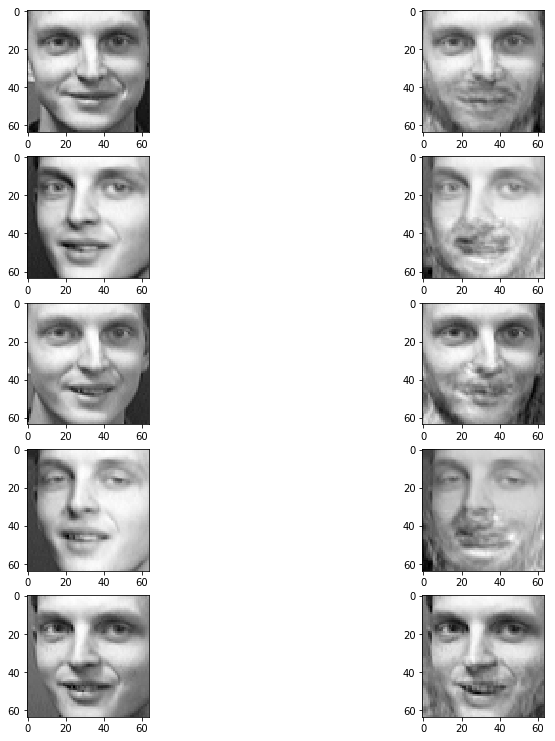

In [13]:
for i in range(n_faces):
    
    true_face = np.hstack((x_test[i], y_test[i]))
    completed_face = np.hstack((x_test[i], pred_data[i]))
    
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)
    sub.imshow(completed_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
    
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.show()